Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

## Parte 1 - Medidas de avaliação e bootstrap

---


### **No exercício dessa semana, continue utilizando a mesma base do exercício 6. Também aplique as mesmas etapas de pré-processamento que você já implementou na semana anterior.**

### Questão 0 (Repetida da semana anterior).

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário definindo uma classe como positiva e a outra como negativa. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


0.0    100
1.0     50
Name: target, dtype: int64

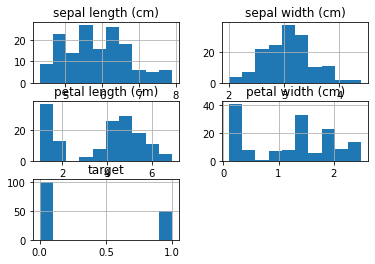

In [ ]:
# Transforme sua base em binária, isso pode ser feito apenas uma vez antes dos outros experimentos.
# usando o Iris como exemplo, mas a resolução seria similar para as outras base
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
dataframe = pd.DataFrame(data=np.c_[iris.data, iris.target], columns= iris['feature_names'] + ['target'])
dataframe.target = dataframe.target.replace(to_replace = 2, value = 0)

classe_0 = dataframe[dataframe['target'] == 0]
classe_1 = dataframe[dataframe['target'] == 1]
dataframe = pd.concat([classe_0, classe_1])
dataframe = dataframe.reset_index(drop=True)

_ = dataframe.hist()
dataframe['target'].value_counts()

In [ ]:
def preprocess(x_treino, x_teste, y_treino, y_teste):
  # Aqui poderia ser feito normalização e outras transformações
  x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo = x_treino, x_teste, y_treino, y_teste
  return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

### Questão 01.

Escolha duas métricas diferentes da semana passada e crie 2 novas funções, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [ ]:
def confusion_matrix(y_test, y_pred):
  conf = np.zeros((2,2))
  conf[0,0] = np.logical_and(y_test == 0, y_pred == 0).sum()
  conf[0,1] = np.logical_and(y_test == 0, y_pred == 1).sum()
  conf[1,1] = np.logical_and(y_test == 1, y_pred == 1).sum()
  conf[1,0] = np.logical_and(y_test == 1, y_pred == 0).sum()
  return conf

actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

conf_mat = confusion_matrix(actual, predicted)
print(conf_mat)

[[1. 3.]
 [2. 4.]]


In [ ]:
# mudar o nome de acordo com sua métrica
def accuracy_score(y_test, y_pred):
  tn = np.logical_and(y_test == 0, y_pred == 0).sum()
  tp = np.logical_and(y_test == 1, y_pred == 1).sum()
  return tn+tp/len(y_test)

### Questão 02.

-  Implemente a técnica bootstrap utilizando a função abaixo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from numpy import mean, std
from matplotlib import pyplot as plt

def classificacao_bootstrap(data, columns, target, preproc_fn, score_fn, score_name, conf_matrix_fn,
                   no_bs=1000, p_teste=0.2, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    conf_matrix_fn: Função. Calcula matriz de confusão
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron,
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))

    clfs = [prcp, dt]
    clfs_names = ['perceptron', 'dt']

    #Inicializa estruturas para matrizes de confusão
    confusion_matrices = {
        'perceptron': np.zeros((2,2)),
        'dt': np.zeros((2,2)),
    }

    results = {'perceptron':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
      ################# IMPLEMENTE AQUI O BOOTSTRAP #########################
        #    Dentro desse loop:
        #     c: variável-objeto que representa o classificador
        #     c_name: Nome do classificador
        #     results: dicionário com vetores de resultado para cada classificador
      #######################################################################
      scores = []
      p_treino = 1 - p_teste
      for i in range(0, no_bs):
        treino = data.sample(frac = p_treino, replace=True)
        teste_indices = data.index.difference(treino.index)
        teste = data.iloc[teste_indices]

        X_treino, X_teste = treino.iloc[:, columns], teste.iloc[:, columns]
        y_treino, y_teste = treino.iloc[:, target], teste.iloc[:, target]

        c.fit(X_treino, y_treino)
        y_test_pred = c.predict(X_teste)
        results[c_name].append( score(y_teste, y_test_pred) )
        #####################  ###############################################
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names],
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()

    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

In [ ]:
results = classificacao(dataframe, [0, 1, 2, 3], 4, preproc_fn=preprocess, score_fn=accuracy_score,
                        score_name='acc', conf_matrix_fn=confusion_matrix)

### Questão 03.

- Rode a função 4 vezes utilizando as diferentes métricas que você implementou
- Compare os resultados e discuta as vantagens/desvantagens de cada uma das métricas

## Parte 2 - Curva ROC e Teste de hipótese

## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_ind()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)): Calcula o teste t para duas amostras independentes
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo

### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça também a seleção dos atributos que achar mais relevantes.

 - Dica: Utilize a função `nunique()` durante a exploração dos dados. Você pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Removendo ID do passageiro, nome e número da cabine, por não serem relevantes ou por ter muitos valores faltantes
df = df.drop(columns=["PassengerId","Name", "Cabin"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
df["Ticket"].nunique()

681

In [ ]:
# Removendo também o Ticket por ter muitos valores diferentes
df = df.drop(columns=["Ticket"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

features_categoricos = ["Sex", "Embarked"]
features_numericos = ["Age", "Fare"]

def preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos):

  transformer_categorico = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder())])

  transformer_numerico = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())])

  preprocessor = ColumnTransformer(
      transformers=[
          ('numerico', transformer_numerico, features_numericos),
          ('categorico', transformer_categorico, features_categoricos),
      ])

  df_train = preprocessor.fit_transform(X_train)
  df_test = preprocessor.transform(X_test)
  nomes = []
  # # Variáveis numéricas não tem alteração de tamanho, logo:
  nomes = nomes + features_numericos

  # Para os dados categóricos devemos acessar o transformador:
  transformacao_categorica = preprocessor.transformers_[1]
  # Depois o pipeline
  pipeline_categorico = transformacao_categorica[1]
  # E finalmente o onehot
  transf_onehot = pipeline_categorico.named_steps['onehot']
  # Para acessar o nome das variáveis usamos o método get_feature_names()
  nomes = nomes + (transf_onehot.get_feature_names().tolist())
  df_train = pd.DataFrame(data = df_train, columns=nomes)
  df_test = pd.DataFrame(data = df_test, columns=nomes)

  # Dropando se é homem e concatenando com as colunas faltantes:
  df_train = df_train.drop(columns=["x0_male"])
  df_test = df_test.drop(columns=["x0_male"])

  # Sem fazer os indices ficarem iguais a copia das colunas extras pode gerar NaNs
  df_train.index = X_train.index
  df_test.index = X_test.index

  colunas_faltantes = ["Pclass", "SibSp", "Parch"]
  for c in colunas_faltantes:
    df_train[c] = X_train[c]
    df_test[c] = X_test[c]

  return df_train, df_test, y_train, y_test

### Questão 02.

Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para **todos** os classificadores (no mesmo gráfico).

Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido? Teste diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar



In [ ]:
df_novo = df.copy(deep=True)
X = df_novo.drop(columns=["Survived"])
y = df_novo["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos)

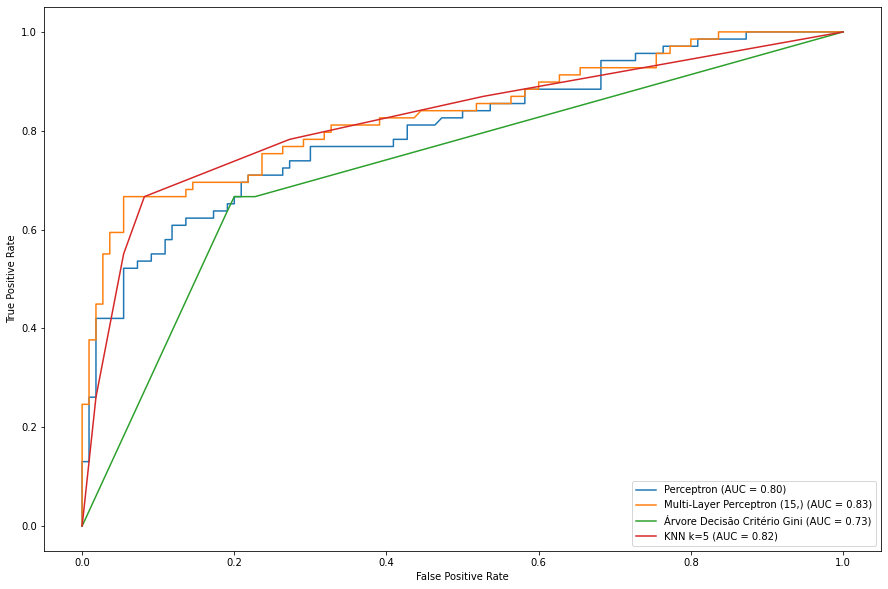

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
import numpy as np

classificadores = {
  "Perceptron" : {"modelo": Perceptron(), "scores": []},
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
for classificador_name in classificadores:
  modelo = classificadores[classificador_name]["modelo"]
  modelo.fit(X_train, y_train)
  metrics.plot_roc_curve(modelo, X_test, y_test, name=classificador_name, ax=ax)
plt.show()

### Questão 03.

Implemente o 10-Fold Cross Validation com os dois melhores classificadores de acordo com a curva ROC e guarde a acurácia de cada fold na chave 'scores' do dicionário de classificadores.

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train, X_test, y_train, y_test = preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos)
    for classificador_name in classificadores:
      modelo = classificadores[classificador_name]["modelo"]
      modelo.fit(X_train, y_train)
      classificadores[classificador_name]['scores'].append(modelo.score(X_test, y_test))

### Questão 04.

Verifique se há diferença estatística significante entre suas acurácias da questão anterior utilizando o teste T (`scipy.stats.ttest_ind`). Considere que há diferença significante se p <= 0.05 (rejeita-se a hipótese nula)

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(classificadores["KNN k=5"]["scores"], classificadores["Multi-Layer Perceptron (15,)"]["scores"], equal_var=False)
if p > 0.05:
	print('Probably the same distribution (p = %.2f)' % (p))
else:
	print('Probably different distributions (p = %.2f)' % (p))

Probably the same distribution (p = 0.15)
